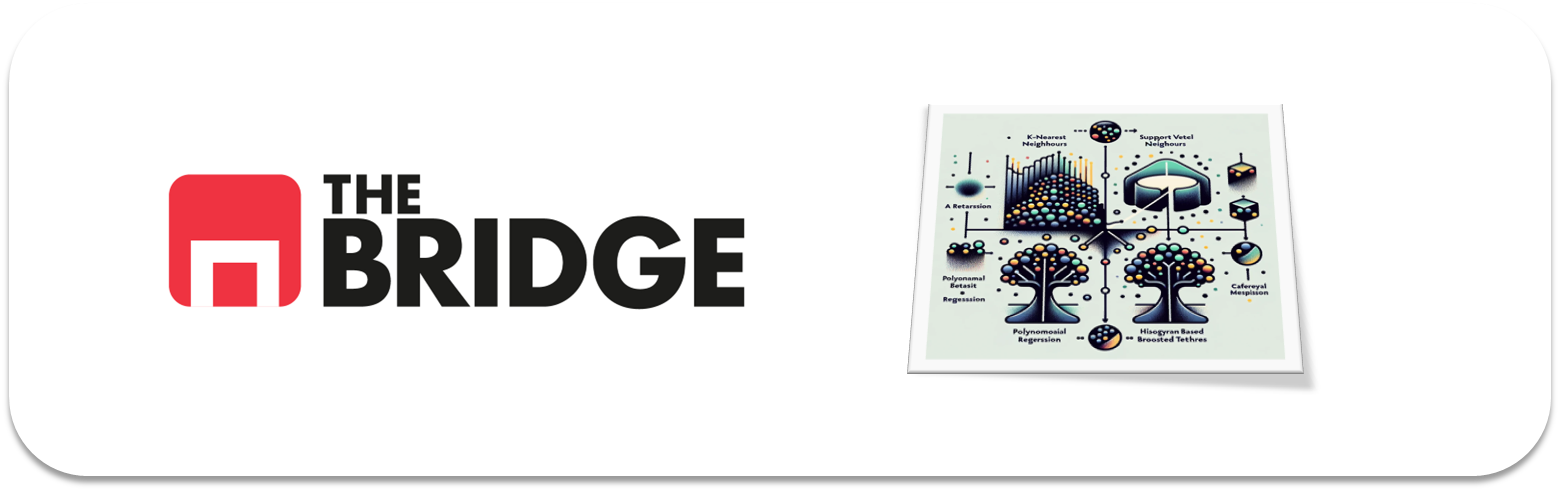

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    precision_recall_fscore_support
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import bootcampviztools as bvt
import toolbox_ML as tml

sns.set_theme(style="whitegrid")
np.random.seed(42)


### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [46]:
df = pd.read_csv("data/credit_npo.csv", sep=",")
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [47]:
df.shape, df.columns.tolist()

((12537, 11),
 ['SeriousDlqin2yrs',
  'RevolvingUtilizationOfUnsecuredLines',
  'age',
  'NumberOfTime30-59DaysPastDueNotWorse',
  'DebtRatio',
  'MonthlyIncome',
  'NumberOfOpenCreditLinesAndLoans',
  'NumberOfTimes90DaysLate',
  'NumberRealEstateLoansOrLines',
  'NumberOfTime60-89DaysPastDueNotWorse',
  'NumberOfDependents'])

In [48]:
display(df.describe(include="all").T)

missing = df.isna().mean().sort_values(ascending=False)
missing[missing > 0]

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,12537.0,0.068916,0.253321,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,12537.0,0.330359,0.368148,0.0,0.030651,0.163490,0.582219,6.0
age,12537.0,52.079445,15.077498,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,12537.0,0.409588,4.055787,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,12537.0,1.902253,9.122216,0.0,0.142268,0.302025,0.506725,99.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,12537.0,8.482332,5.165422,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,12537.0,0.259312,4.035658,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,12537.0,0.999202,1.134325,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,12537.0,0.228364,4.018873,0.0,0.000000,0.000000,0.000000,98.0


MonthlyIncome         0.057510
NumberOfDependents    0.014118
dtype: float64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [50]:
tml.describe_df(df)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
DATA_TYPE,int64,float64,int64,int64,float64,float64,int64,int64,int64,int64,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,5.8,0.0,0.0,0.0,0.0,1.4
UNIQUE_VALUES,2,10764,78,10,11547,4167,43,13,16,8,10
CARDIN (%),0.02,85.86,0.62,0.08,92.1,33.24,0.34,0.1,0.13,0.06,0.08


In [51]:
tml.tipifica_variables(df, umbral_categoria=8, umbral_continua=15.0)

,nombre_variable,tipo_sugerido
0,SeriousDlqin2yrs,Binaria
1,RevolvingUtilizationOfUnsecuredLines,Numerica Continua
2,age,Numerica Discreta
3,NumberOfTime30-59DaysPastDueNotWorse,Numerica Discreta
4,DebtRatio,Numerica Continua
5,MonthlyIncome,Numerica Continua
6,NumberOfOpenCreditLinesAndLoans,Numerica Discreta
7,NumberOfTimes90DaysLate,Numerica Discreta
8,NumberRealEstateLoansOrLines,Numerica Discreta
9,NumberOfTime60-89DaysPastDueNotWorse,Numerica Discreta


Todas las columnas, excepto el target son **numéricas**:
- Numerica continuas: RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome
- Numerica discretas: age, NumberOfTime30-59DaysPastDueNotWorse, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents

(10, 2)


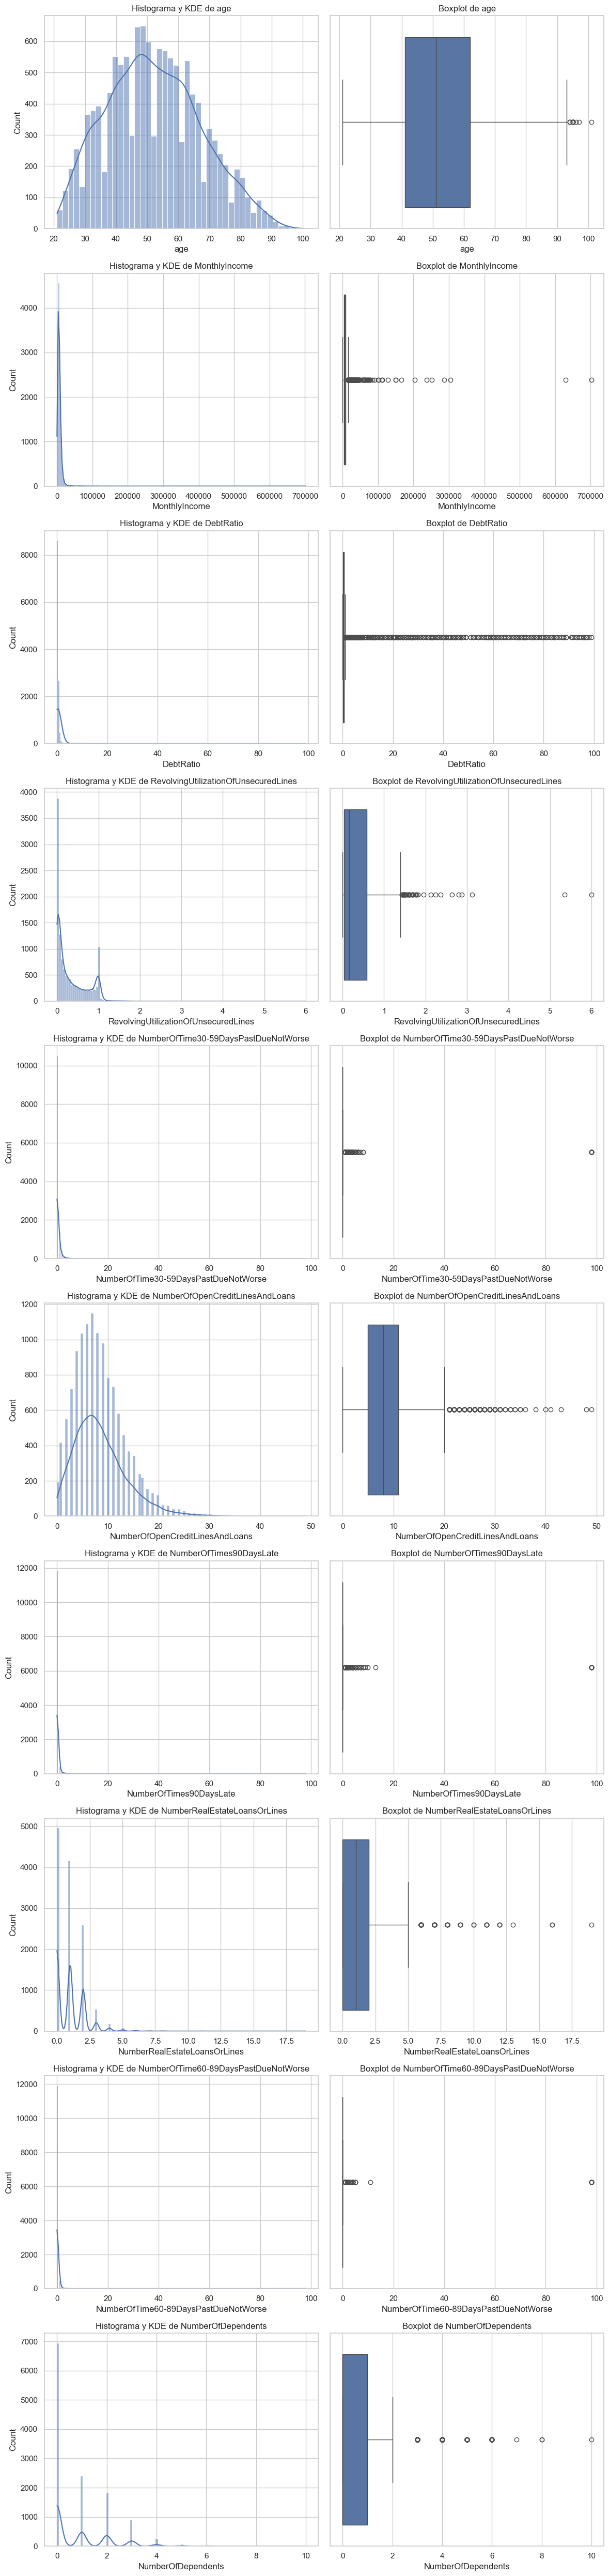

In [52]:
eda_cols = [c for c in ["age", "MonthlyIncome", "DebtRatio", "RevolvingUtilizationOfUnsecuredLines", "NumberOfTime30-59DaysPastDueNotWorse", "NumberOfOpenCreditLinesAndLoans", "NumberOfTimes90DaysLate", "NumberRealEstateLoansOrLines", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfDependents"] if c in df.columns]

bvt.plot_combined_graphs(df, eda_cols)

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

- Nos enfrentamos a un tipo de problema de: **clasificación binaria supervisada** (existen dos clases: *sí/no*).
- **Target:** `SeriousDlqin2yrs`:
  - `1` → la persona **tendrá** dificultades financieras (por ejemplo, retrasos graves en pagos) en los próximos 2 años
  - `0` → la persona **no tendrá** dificultades financieras en los próximos 2 años

### #1.3
Pinta la distribución de frecuencias del target y coméntala

- Aquí vemos si el dataset está **desbalanceado** pocos casos de 1.
- La accuracy puede ser engañosa y tenemos que optimizar y aplicar técnicas de balanceo.

SeriousDlqin2yrs
0    11673
1      864
Name: count, dtype: int64

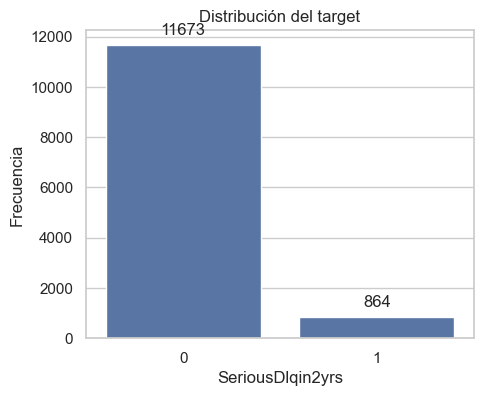

SeriousDlqin2yrs
0    0.931084
1    0.068916
Name: proporcion, dtype: float64

In [53]:

target_col = "SeriousDlqin2yrs"
if target_col not in df.columns:
    raise KeyError(f"No encuentro la columna target esperada: {target_col}. Columnas: {df.columns.tolist()}")

target_counts = df[target_col].value_counts().sort_index()
display(target_counts)

plt.figure(figsize=(5,4))
ax = sns.barplot(x=target_counts.index.astype(str), y=target_counts.values)
plt.title("Distribución del target")
plt.xlabel("SeriousDlqin2yrs")
plt.ylabel("Frecuencia")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom", xytext=(0, 5), textcoords="offset points")
plt.show()

# Frecuencia relativa
target_pct = target_counts / target_counts.sum()
display(target_pct.rename("proporcion"))


### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

Esto es lo que haremos:

1. **Separación train/test** con estratificación.
2. **Preprocesado**: rellenamos los missing y hacemos un escalado.
3. **Comparación de modelos** mas de 3 modelos, incluyendo **KNN** con **validación cruzada** y voy a añadir `class_weight='balanced'` y/o **SMOTE**.
4. **Optimización de hiperparámetros** del mejor modelo.
5. **Evaluación final** del test y visualización del análisis de errores (FN/FP)

In [54]:
X = df.drop(columns=[target_col])
y = df[target_col].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preproceso (ya hemos visto antes que todo es numérico)
num_features = X_train.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_features)
    ],
    remainder="drop"
)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scoring = {"recall_macro": "recall_macro", "f1_macro": "f1_macro", "roc_auc": "roc_auc"}


In [55]:
pipes = {
    "LogReg (class_weight=balanced)": Pipeline(steps=[
        ("prep", preprocessor),
        ("model", LogisticRegression(max_iter=3000, class_weight="balanced", n_jobs=-1))
    ]),
    "KNN": Pipeline(steps=[
        ("prep", preprocessor),
        ("model", KNeighborsClassifier())
    ]),
    "RandomForest (class_weight=balanced)": Pipeline(steps=[
        ("prep", preprocessor),
        ("model", RandomForestClassifier(
            n_estimators=200, random_state=42, class_weight="balanced_subsample", n_jobs=-1
        ))
    ]),
    "SMOTE + LogReg": ImbPipeline(steps=[
        ("prep", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("model", LogisticRegression(max_iter=3000, n_jobs=-1))
    ]),
    "SMOTE + KNN": ImbPipeline(steps=[
        ("prep", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("model", KNeighborsClassifier())
    ]),
}

rows = []
for name, pipe in pipes.items():
    cv_res = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=1)
    rows.append({
        "modelo": name,
        "recall_macro_mean": cv_res["test_recall_macro"].mean(),
        "recall_macro_std": cv_res["test_recall_macro"].std(),
        "f1_macro_mean": cv_res["test_f1_macro"].mean(),
        "roc_auc_mean": cv_res["test_roc_auc"].mean(),
    })

cv_df = pd.DataFrame(rows).sort_values("recall_macro_mean", ascending=False)
cv_df


,modelo,recall_macro_mean,recall_macro_std,f1_macro_mean,roc_auc_mean
0,LogReg (class_weight=balanced),0.753581,0.008789,0.576545,0.819390
3,SMOTE + LogReg,0.747404,0.012519,0.571509,0.811054
4,SMOTE + KNN,0.664160,0.012940,0.584188,0.712097
2,RandomForest (class_weight=balanced),0.556759,0.004508,0.580815,0.814540
1,KNN,0.545906,0.002296,0.564437,0.684998


**Resultado:** el mejor por **recall macro (CV)** fue **LogReg (class_weight=balanced)**.

In [56]:
best_pipe = pipes["LogReg (class_weight=balanced)"]

param_grid = {"model__C": [0.05, 0.1, 0.3, 1, 3, 10]}

grid = GridSearchCV(
    estimator=best_pipe,
    param_grid=param_grid,
    scoring="recall_macro",
    cv=cv,
    n_jobs=1
)

grid.fit(X_train, y_train)

print("Mejor recall_macro (CV):", grid.best_score_)
print("Mejores params:", grid.best_params_)


Mejor recall_macro (CV): 0.7535814644587063
Mejores params: {'model__C': 1}


              precision    recall  f1-score   support

           0      0.974     0.764     0.857      2335
           1      0.186     0.728     0.297       173

    accuracy                          0.762      2508
   macro avg      0.580     0.746     0.577      2508
weighted avg      0.920     0.762     0.818      2508



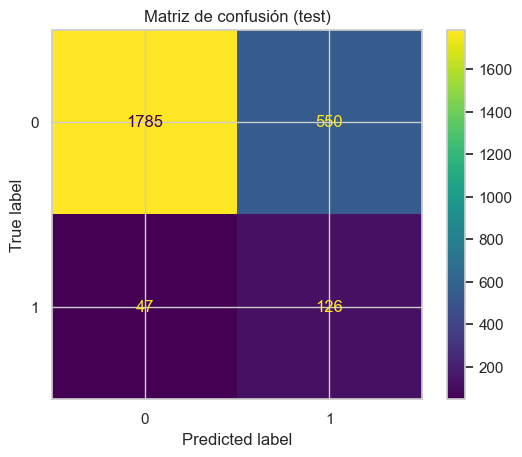

Recall por clase: {0: np.float64(0.7644539614561028), 1: np.float64(0.7283236994219653)}
Macro recall (test): 0.746388830439034
Confusion matrix [[TN,FP],[FN,TP]]: [[1785  550]
 [  47  126]]


In [57]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(values_format="d")
plt.title("Matriz de confusión (test)")
plt.show()

# Macro recall en test
prec, rec, f1, sup = precision_recall_fscore_support(y_test, y_pred, labels=[0,1], zero_division=0)
print("Recall por clase:", dict(zip([0,1], rec)))
print("Macro recall (test):", rec.mean())
print("Confusion matrix [[TN,FP],[FN,TP]]:", cm)


**Resultados en test:**
- Macro recall **0.746388830**
- Confusion matrix (labels [0,1]):  
  - TN=1785, FP=550
  - FN=47, TP=126

Como lo interpreto:
TN (1785): el modelo acierta cuando predice “no habrá dificultades” y efectivamente la persona era clase 0.
TP (126): el modelo acierta detectando personas que sí tendrán dificultades (clase 1).

FN (47): son casos de riesgo real (1) que el modelo no detecta (los predice como 0). Estos son los clientes que se nos escapan, ya que son potenciales de impago

FP (550): el modelo marca como riesgo (1) a personas que realmente eran 0. Estos son los que rechazamos porque creemos que no pagaran pero en realidad si lo harían.

El modelo consigue un acertar bastante alto en la clase 1, pero a cambio tiene precision baja en la clase 1, lo que tenemos bastantes falsos positivos y por lo tanto rechazaremos gente que en realidad si pagaría

In [58]:
analysis_df = X_test.copy()
analysis_df["y_true"] = y_test.values
analysis_df["y_pred"] = y_pred

fn = analysis_df[(analysis_df["y_true"]==1) & (analysis_df["y_pred"]==0)]
fp = analysis_df[(analysis_df["y_true"]==0) & (analysis_df["y_pred"]==1)]
tp = analysis_df[(analysis_df["y_true"]==1) & (analysis_df["y_pred"]==1)]
tn = analysis_df[(analysis_df["y_true"]==0) & (analysis_df["y_pred"]==0)]

print("FN:", fn.shape[0], "| FP:", fp.shape[0], "| TP:", tp.shape[0], "| TN:", tn.shape[0])

display(fn.head(10))
display(fp.head(10))

# Medias por grupo
num_cols = X.columns.tolist()
means = pd.DataFrame({
    "FN": fn[num_cols].mean(),
    "TP": tp[num_cols].mean(),
    "FP": fp[num_cols].mean(),
    "TN": tn[num_cols].mean(),
}).T
means


FN: 47 | FP: 550 | TP: 126 | TN: 1785


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,y_true,y_pred
8149,0.136994,35,0,0.021669,78500.0,4,0,1,0,2.0,1,0
9024,0.152529,39,1,0.351440,2742.0,13,0,0,1,2.0,1,0
10310,0.243918,48,0,0.177770,8600.0,15,0,1,0,2.0,1,0
11675,0.133063,49,1,0.182882,10257.0,9,0,2,0,3.0,1,0
7735,0.511081,51,0,0.275066,6063.0,5,0,1,0,0.0,1,0
7720,0.385942,59,0,0.238936,7930.0,5,0,1,0,2.0,1,0
7877,1.000000,56,1,0.078012,78000.0,6,1,1,0,3.0,1,0
797,0.500600,26,0,37.000000,NaN,3,0,0,0,1.0,1,0
5027,0.066886,39,1,0.191606,5646.0,7,0,1,0,3.0,1,0
1388,0.333434,58,0,0.093646,101167.0,19,0,7,0,0.0,1,0


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,y_true,y_pred
9158,0.500357,32,0,1.580521,2340.0,7,0,1,0,1.0,0,1
4584,0.884052,29,0,0.779475,1636.0,9,0,0,0,0.0,0,1
1332,0.936412,61,0,0.230236,7500.0,11,0,2,0,0.0,0,1
4733,1.000000,37,0,0.000000,3900.0,0,0,0,0,2.0,0,1
2621,1.000000,59,0,0.102971,5350.0,3,0,1,0,0.0,0,1
4972,0.954561,39,2,0.519350,9224.0,7,0,2,0,2.0,0,1
5837,0.625229,33,0,0.813839,1213.0,5,0,1,0,1.0,0,1
7797,0.828172,31,0,0.050647,6100.0,2,0,0,0,0.0,0,1
7766,1.000000,24,0,0.021486,2745.0,2,0,0,0,0.0,0,1
3271,1.000000,48,0,0.000217,4600.0,1,0,0,0,1.0,0,1


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
FN,0.215441,47.276596,0.319149,2.513905,12759.931818,9.702128,0.127660,1.468085,0.148936,0.851064
TP,0.890401,44.690476,5.634921,1.235266,4825.216667,7.468254,5.785714,1.047619,5.182540,1.031746
FP,0.817905,45.149091,0.670909,0.893255,5732.769376,7.747273,0.349091,1.016364,0.260000,0.990792
TN,0.141799,54.976471,0.101401,1.975136,7415.319022,8.725490,0.014006,1.012325,0.021849,0.792711
